In [1]:
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

import math  
import numpy as np
import pandas as pd

import missingno as msno

In [2]:
df = pd.read_csv('datasets/world_development_indicators.csv')
df.head()

,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Argentina,ARG,People with basic handwashing facilities inclu...,SH.STA.HYGN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,People using at least basic sanitation service...,SH.STA.BASS.ZS,9.262178e+01,9.318250e+01,9.374175e+01,9.416756e+01,9.420105e+01,9.423485e+01,9.425851e+01,NaN,NaN,NaN
2,Argentina,ARG,People using safely managed sanitation service...,SH.STA.SMSS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,"International tourism, number of arrivals",ST.INT.ARVL,6.800000e+06,6.703000e+06,6.497000e+06,6.510000e+06,7.165000e+06,6.816000e+06,6.668000e+06,6711000.0,6942000.0,NaN
4,Argentina,ARG,"International tourism, number of departures",ST.INT.DPRT,5.307000e+06,6.686000e+06,7.266000e+06,6.746000e+06,6.517000e+06,7.807000e+06,1.041700e+07,12213000.0,11130000.0,NaN


In [3]:
len(df['Country Name'].unique())

267

In [4]:
df.replace('United States', 'US', inplace = True)
df.replace('Korea, Rep.', 'Korea, South', inplace = True)
df.replace('Egypt, Arab Rep.', 'Egypt', inplace = True)
df.replace('Bahamas, The', 'Bahamas', inplace = True)
df.replace('Myanmar', 'Burma', inplace = True)
df.replace('Russian Federation', 'Russia', inplace = True)
df.replace('Iran, Islamic Rep.', 'Iran', inplace = True)
df.replace('Venezuela, RB', 'Venezuela', inplace = True)
df.replace('Czech Republic', 'Czechia', inplace = True)
df.replace('Syrian Arab Republic', 'Syria', inplace = True)
df.replace('St. Kitts and Nevis', 'Saint Kitts and Nevis', inplace = True)
df.replace('St. Lucia', 'Saint Lucia', inplace = True)
df.replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines', inplace = True)
df.replace('Kyrgyz Republic', 'Kyrgyzstan', inplace = True)
df.replace('Lao PDR', 'Laos', inplace = True)
df.replace('Slovak Republic', 'Slovakia', inplace = True)
df.replace('Gambia, The', 'Gambia', inplace = True)
df.replace('Congo, Dem. Rep.', 'Congo (Kinshasa)', inplace = True)
df.replace('Congo, Rep.', 'Congo (Brazzaville)', inplace = True)
df.replace('Brunei Darussalam', 'Brunei', inplace = True)


In [5]:
df_covid_con = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_covid_fat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [6]:
df_covid_con = df_covid_con.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
df_covid_fat = df_covid_fat.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
df_covid_rec = df_covid_rec.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

df_covid_con.tail()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
179,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,174,188,203,212,218,233,237,240,241,245
180,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,...,98,109,116,119,134,161,194,217,237,254
181,Western Sahara,24.2155,-12.8858,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
182,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,28,29,35,35,36,39,39,39,39,39
183,Zimbabwe,-20.0000,30.0000,0,0,0,0,0,0,0,...,7,7,7,8,8,9,9,9,9,10


In [7]:
dates = df_covid_con.columns[4:]
df_covid_con = df_covid_con.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')
df_covid_fat = df_covid_fat.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')
df_covid_rec = df_covid_rec.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')


In [8]:
df_covid_rec.head()

,Country/Region,Lat,Long,Date,Recovered
0,Afghanistan,33.0000,65.0000,1/23/20,0
1,Albania,41.1533,20.1683,1/23/20,0
2,Algeria,28.0339,1.6596,1/23/20,0
3,Andorra,42.5063,1.5218,1/23/20,0
4,Angola,-11.2027,17.8739,1/23/20,0


In [9]:
df_covid_con['Date'] =pd.to_datetime(df_covid_con.Date)
df_covid_fat['Date'] =pd.to_datetime(df_covid_fat.Date)
df_covid_rec['Date'] =pd.to_datetime(df_covid_rec.Date)

In [10]:
# df_covid = df_covid.groupby('Date')['Confirmed'].sum().reset_index()

In [11]:
df_covid_rec.tail()

,Country/Region,Lat,Long,Date,Recovered
13795,Vietnam,16.0000,108.0000,2020-04-06,95
13796,West Bank and Gaza,31.9522,35.2332,2020-04-06,24
13797,Western Sahara,24.2155,-12.8858,2020-04-06,0
13798,Zambia,-15.4167,28.2833,2020-04-06,5
13799,Zimbabwe,-20.0000,30.0000,2020-04-06,0


In [12]:
df_covid = df_covid_con.merge(df_covid_fat, 
               on=['Country/Region', 'Lat', 'Long', 'Date']).merge(df_covid_rec, 
                                                                   on=['Country/Region', 'Lat', 'Long', 'Date'])

In [13]:
df_covid.tail()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
13420,Vietnam,16.0000,108.0000,2020-04-06,245,0,95
13421,West Bank and Gaza,31.9522,35.2332,2020-04-06,254,1,24
13422,Western Sahara,24.2155,-12.8858,2020-04-06,4,0,0
13423,Zambia,-15.4167,28.2833,2020-04-06,39,1,5
13424,Zimbabwe,-20.0000,30.0000,2020-04-06,10,1,0


In [14]:
common = set(df_covid['Country/Region'].unique()).intersection(set(df['Country Name'].unique()))

In [15]:
set(df_covid['Country/Region'].unique()) - common

{'Diamond Princess', 'Holy See', 'MS Zaandam', 'Taiwan*', 'Western Sahara'}

In [16]:
# set(df['Country Name'].unique()) - common

In [17]:
lol = []
cols = []
for country in common:
    temp = df[df['Country Name'] == country].reset_index()
    temp_vals = temp[df.columns[4:]]
    temp['Latest'] = temp_vals.ffill(axis=1).iloc[:, -1]
    t= temp[['Country Name', 'Series Name', 'Latest']].pivot(index='Country Name', 
                                                          columns='Series Name', values='Latest').reset_index()
    cols = list(t.columns)
    lol.append(list(t.loc[0]))
    

In [18]:
# cols
cols = [
    'Country Name',
    'Birth rate (per 1,000)',
    'Death, by communicable diseases and others (%)',
    'Death, by non-communicable diseases (%)',
    'Health expenditure per capita, PPP ($)',
    'Death rate (per 1,000)',
    'Hospital beds (per 1,000)',
    'International tourism, number of arrivals',
    'International tourism, number of departures',
    'Life expectancy at birth (years)',
    'Mortality rate, adult, female (per 1,000)',
    'Mortality rate, adult, male (per 1,000)',
    'Nurses and midwives (per 1,000)',
    'People using at least basic sanitation services (%)',
    'People using safely managed sanitation services (%)',
    'People with basic handwashing facilities (%)',
    'Population ages 65+ (%)',
    'Population density (people per sq.km)',
    'Population',
    'Smoking prevalence (ages 15+)'
]

In [19]:
df_wdi = pd.DataFrame(lol, columns = cols)
df_wdi.head()

,Country Name,"Birth rate (per 1,000)","Death, by communicable diseases and others (%)","Death, by non-communicable diseases (%)","Health expenditure per capita, PPP ($)","Death rate (per 1,000)","Hospital beds (per 1,000)","International tourism, number of arrivals","International tourism, number of departures",Life expectancy at birth (years),"Mortality rate, adult, female (per 1,000)","Mortality rate, adult, male (per 1,000)","Nurses and midwives (per 1,000)",People using at least basic sanitation services (%),People using safely managed sanitation services (%),People with basic handwashing facilities (%),Population ages 65+ (%),Population density (people per sq.km),Population,Smoking prevalence (ages 15+)
0,Saint Vincent and the Grenadines,14.403,13.4,81.0,409.140058,9.162,2.6,80000.0,NaN,72.300000,125.864,179.467,2.5801,87.184345,NaN,NaN,9.589787,282.589744,110210.0,NaN
1,Morocco,19.399,14.0,79.6,465.699602,5.072,1.1,12289000.0,1923000.0,76.218000,63.356,73.550,1.0979,88.503644,38.750151,NaN,7.012905,80.728519,36029138.0,23.4
2,Sao Tome and Principe,31.967,33.9,54.7,196.896879,4.908,2.9,33400.0,NaN,69.933000,160.771,217.175,2.2600,42.974944,NaN,41.339875,2.925678,219.820833,211028.0,NaN
3,Serbia,9.200,2.4,94.6,1322.563548,14.800,5.7,1711000.0,NaN,76.087805,75.775,143.428,6.1203,97.567199,24.726045,97.718934,18.345793,79.831740,6982084.0,38.9
4,Eswatini,26.773,53.7,36.7,663.252580,9.843,2.1,782000.0,1717000.0,58.319000,350.238,486.090,2.0000,58.351983,NaN,24.096963,4.014588,66.057616,1136191.0,9.0


In [20]:
df_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 20 columns):
Country Name                                           174 non-null object
Birth rate (per 1,000)                                 174 non-null float64
Death, by communicable diseases and others (%)         166 non-null float64
Death, by non-communicable diseases (%)                166 non-null float64
Health expenditure per capita, PPP ($)                 169 non-null float64
Death rate (per 1,000)                                 174 non-null float64
Hospital beds (per 1,000)                              153 non-null float64
International tourism, number of arrivals              165 non-null float64
International tourism, number of departures            99 non-null float64
Life expectancy at birth (years)                       170 non-null float64
Mortality rate, adult, female (per 1,000)              167 non-null float64
Mortality rate, adult, male (per 1,000)                167 no

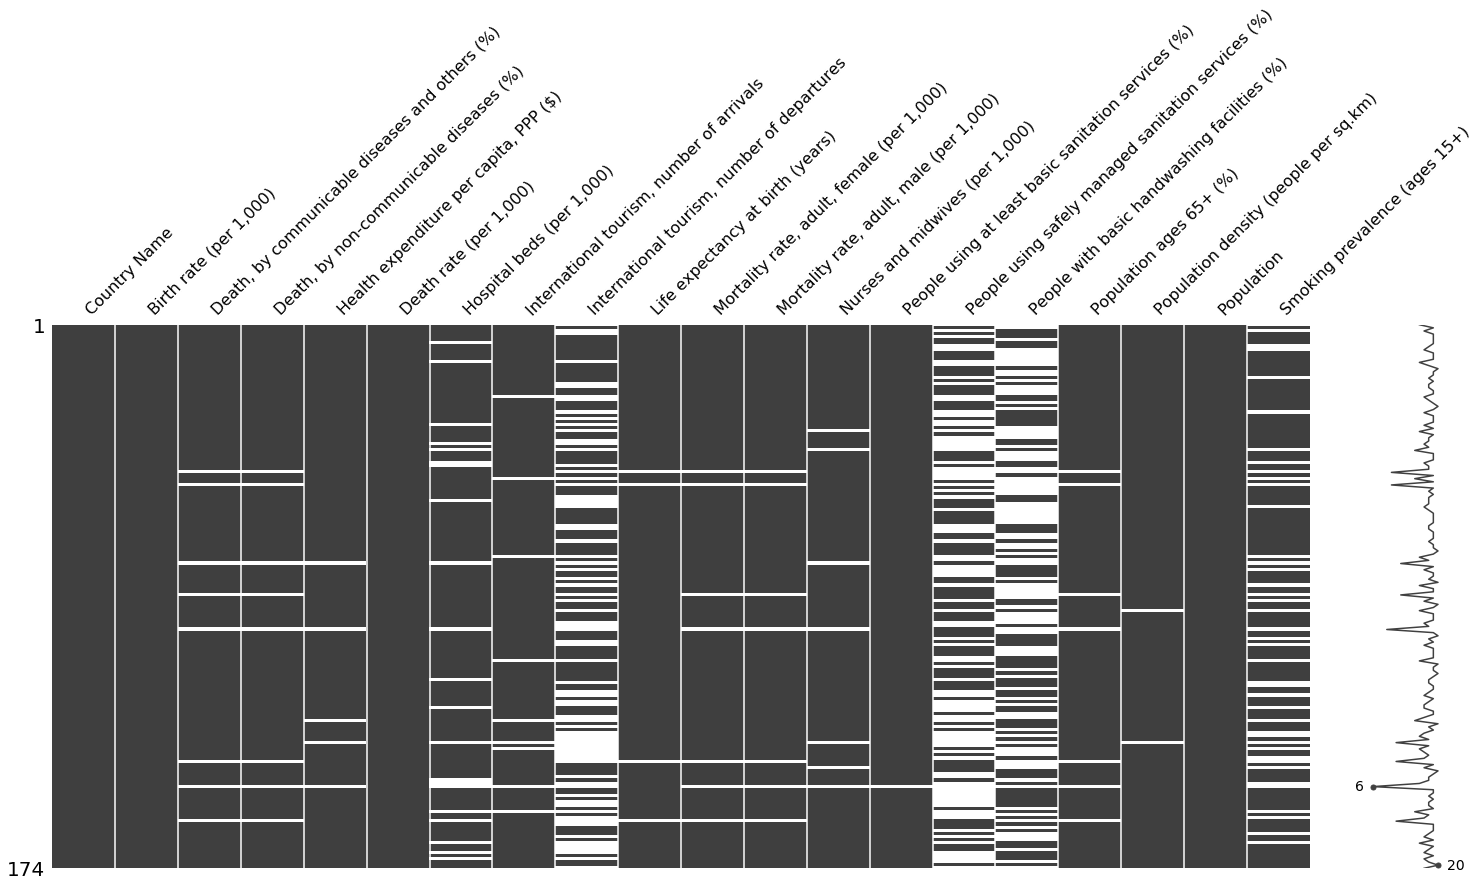

In [21]:
msno.matrix(df_wdi)

In [22]:
math.ceil(len(df_wdi)*0.3)

53

In [23]:
df_wdi.isnull().sum().sort_values()[::-1]

People with basic handwashing facilities (%)           91
People using safely managed sanitation services (%)    88
International tourism, number of departures            75
Smoking prevalence (ages 15+)                          41
Hospital beds (per 1,000)                              21
International tourism, number of arrivals               9
Death, by communicable diseases and others (%)          8
Death, by non-communicable diseases (%)                 8
Population ages 65+ (%)                                 7
Nurses and midwives (per 1,000)                         7
Mortality rate, adult, male (per 1,000)                 7
Mortality rate, adult, female (per 1,000)               7
Health expenditure per capita, PPP ($)                  5
Life expectancy at birth (years)                        4
Population density (people per sq.km)                   2
People using at least basic sanitation services (%)     1
Death rate (per 1,000)                                  0
Population    

In [24]:
df_wdi.columns[df_wdi.isnull().sum() < math.ceil(len(df_wdi)*0.3)]

Index(['Country Name', 'Birth rate (per 1,000)',
       'Death, by communicable diseases and others (%)',
       'Death, by non-communicable diseases (%)',
       'Health expenditure per capita, PPP ($)', 'Death rate (per 1,000)',
       'Hospital beds (per 1,000)',
       'International tourism, number of arrivals',
       'Life expectancy at birth (years)',
       'Mortality rate, adult, female (per 1,000)',
       'Mortality rate, adult, male (per 1,000)',
       'Nurses and midwives (per 1,000)',
       'People using at least basic sanitation services (%)',
       'Population ages 65+ (%)', 'Population density (people per sq.km)',
       'Population', 'Smoking prevalence (ages 15+)'],
      dtype='object')

In [25]:
df_wdi = df_wdi[df_wdi.columns[df_wdi.isnull().sum() < math.ceil(len(df_wdi)*0.3)]].reindex()

In [26]:
plt.rcParams['figure.figsize'] = 11,11

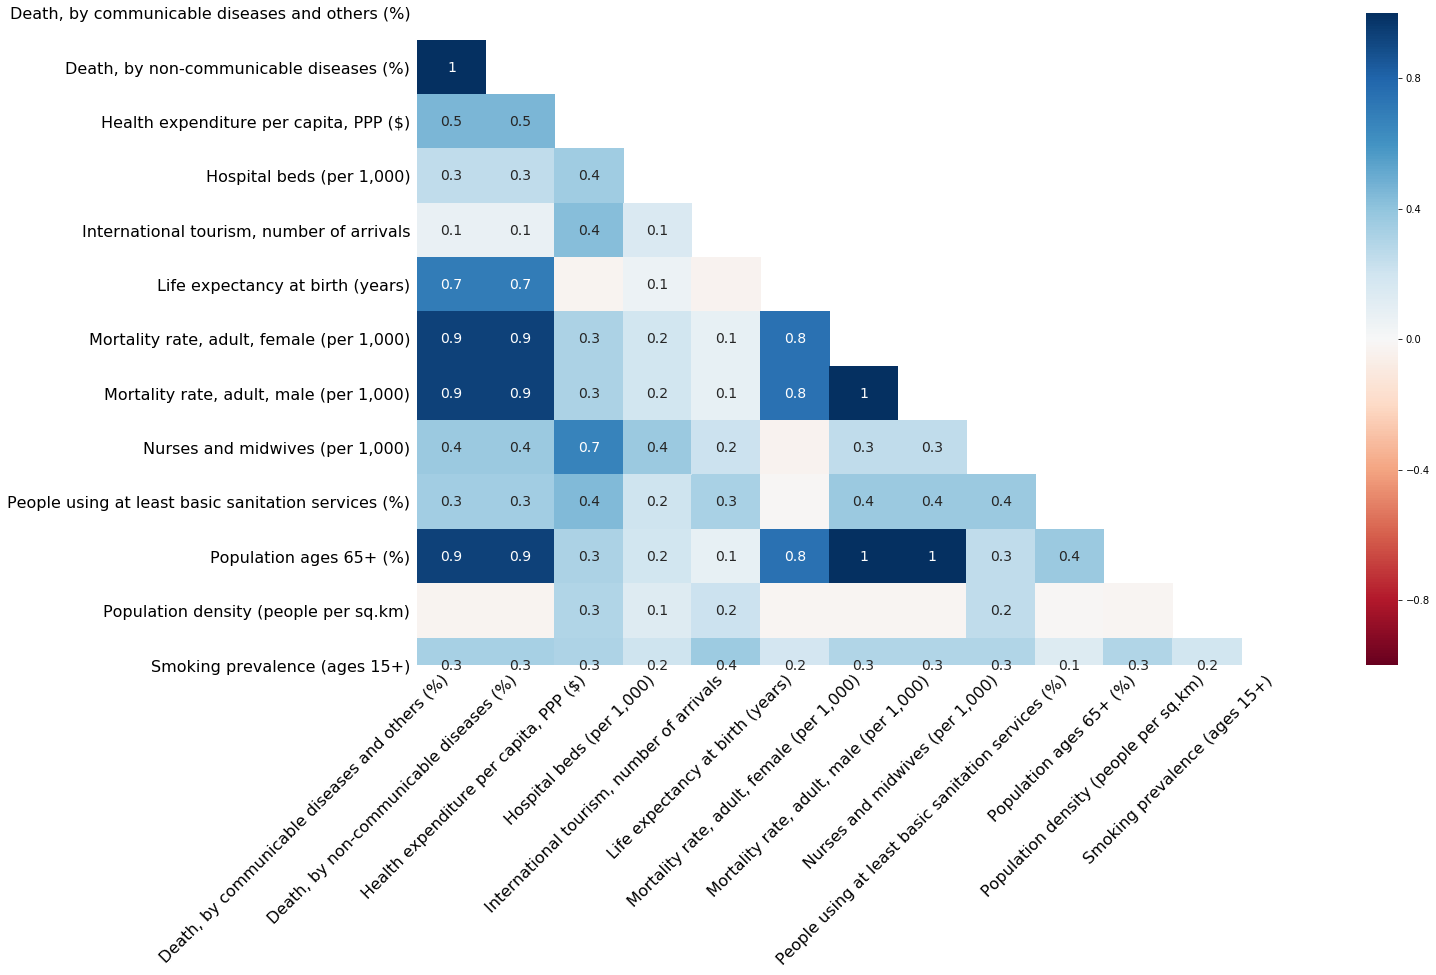

In [27]:
msno.heatmap(df_wdi)

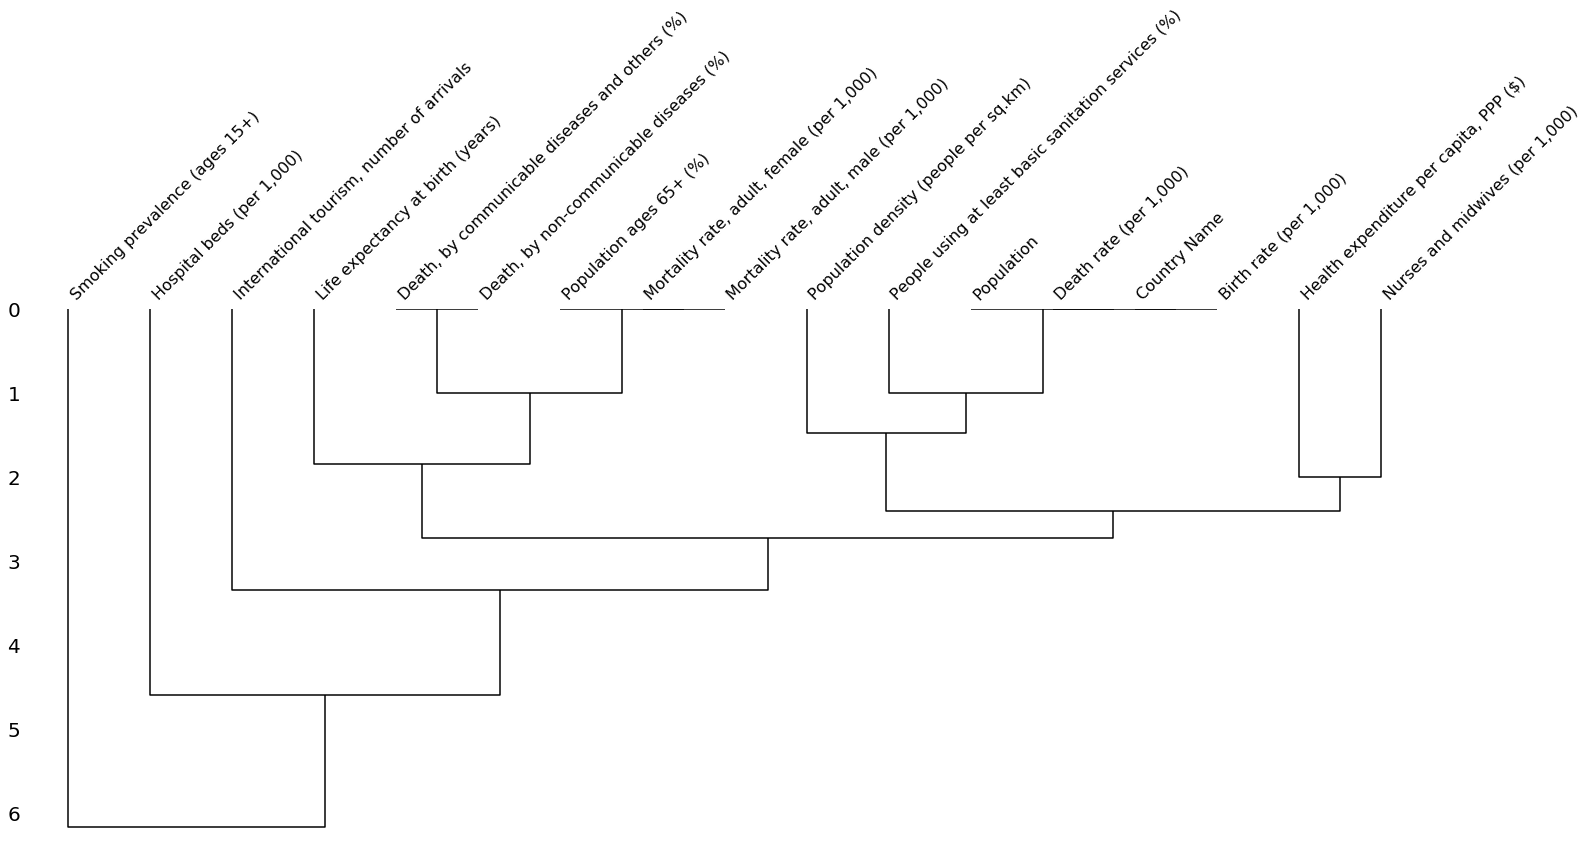

In [28]:
msno.dendrogram(df_wdi)

In [29]:
imputer = KNNImputer(n_neighbors=5, weights = 'distance')
imp = imputer.fit_transform(df_wdi.drop(['Country Name'], 1))

In [30]:
len(imp[0])

16

In [31]:
df_wdi[df_wdi.columns[1:]] = imp
# df_wdi[df_wdi.columns[1:]]

In [32]:
df_wdi

,Country Name,"Birth rate (per 1,000)","Death, by communicable diseases and others (%)","Death, by non-communicable diseases (%)","Health expenditure per capita, PPP ($)","Death rate (per 1,000)","Hospital beds (per 1,000)","International tourism, number of arrivals",Life expectancy at birth (years),"Mortality rate, adult, female (per 1,000)","Mortality rate, adult, male (per 1,000)","Nurses and midwives (per 1,000)",People using at least basic sanitation services (%),Population ages 65+ (%),Population density (people per sq.km),Population,Smoking prevalence (ages 15+)
0,Saint Vincent and the Grenadines,14.403,13.4,81.0,409.140058,9.162,2.600000,80000.0,72.300000,125.864,179.467,2.5801,87.184345,9.589787,282.589744,110210.0,17.580640
1,Morocco,19.399,14.0,79.6,465.699602,5.072,1.100000,12289000.0,76.218000,63.356,73.550,1.0979,88.503644,7.012905,80.728519,36029138.0,23.400000
2,Sao Tome and Principe,31.967,33.9,54.7,196.896879,4.908,2.900000,33400.0,69.933000,160.771,217.175,2.2600,42.974944,2.925678,219.820833,211028.0,18.037982
3,Serbia,9.200,2.4,94.6,1322.563548,14.800,5.700000,1711000.0,76.087805,75.775,143.428,6.1203,97.567199,18.345793,79.831740,6982084.0,38.900000
4,Eswatini,26.773,53.7,36.7,663.252580,9.843,2.100000,782000.0,58.319000,350.238,486.090,2.0000,58.351983,4.014588,66.057616,1136191.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Moldova,10.274,4.2,90.1,480.383000,11.528,5.800000,160000.0,71.717000,96.537,239.217,4.5113,76.308199,11.469556,123.519804,3545883.0,24.200000
170,Maldives,14.891,8.0,84.4,1628.542879,2.883,3.389442,1484000.0,78.325000,53.312,75.445,3.9504,99.372998,3.703345,1718.986667,515696.0,28.300000
171,Uruguay,13.963,7.6,84.9,1958.900218,9.461,2.800000,3469000.0,77.632000,75.028,131.872,1.9299,96.596192,14.814520,19.708028,3449299.0,16.800000
172,Ecuador,19.968,15.1,72.2,942.886660,5.101,1.500000,2535000.0,76.584000,83.550,156.919,1.2000,87.988716,7.157290,68.788682,17084357.0,7.100000


In [33]:
temp = df_covid[df_covid['Date'] == max(df_covid['Date'].values)][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

In [34]:
master_df = df_wdi.rename(columns = {'Country Name':'Country/Region'}).merge(temp, on='Country/Region')

In [35]:
master_df['Active'] = master_df['Confirmed'] - (master_df['Recovered'] + master_df['Deaths'])

In [36]:
master_df.head()

,Country/Region,"Birth rate (per 1,000)","Death, by communicable diseases and others (%)","Death, by non-communicable diseases (%)","Health expenditure per capita, PPP ($)","Death rate (per 1,000)","Hospital beds (per 1,000)","International tourism, number of arrivals",Life expectancy at birth (years),"Mortality rate, adult, female (per 1,000)",...,"Nurses and midwives (per 1,000)",People using at least basic sanitation services (%),Population ages 65+ (%),Population density (people per sq.km),Population,Smoking prevalence (ages 15+),Confirmed,Deaths,Recovered,Active
0,Saint Vincent and the Grenadines,14.403,13.4,81.0,409.140058,9.162,2.6,80000.0,72.300000,125.864,...,2.5801,87.184345,9.589787,282.589744,110210.0,17.580640,7,0,1,6
1,Morocco,19.399,14.0,79.6,465.699602,5.072,1.1,12289000.0,76.218000,63.356,...,1.0979,88.503644,7.012905,80.728519,36029138.0,23.400000,1120,80,81,959
2,Sao Tome and Principe,31.967,33.9,54.7,196.896879,4.908,2.9,33400.0,69.933000,160.771,...,2.2600,42.974944,2.925678,219.820833,211028.0,18.037982,4,0,0,4
3,Serbia,9.200,2.4,94.6,1322.563548,14.800,5.7,1711000.0,76.087805,75.775,...,6.1203,97.567199,18.345793,79.831740,6982084.0,38.900000,2200,58,0,2142
4,Eswatini,26.773,53.7,36.7,663.252580,9.843,2.1,782000.0,58.319000,350.238,...,2.0000,58.351983,4.014588,66.057616,1136191.0,9.000000,10,0,4,6


In [37]:
plt.rcParams['figure.figsize'] = 11,11

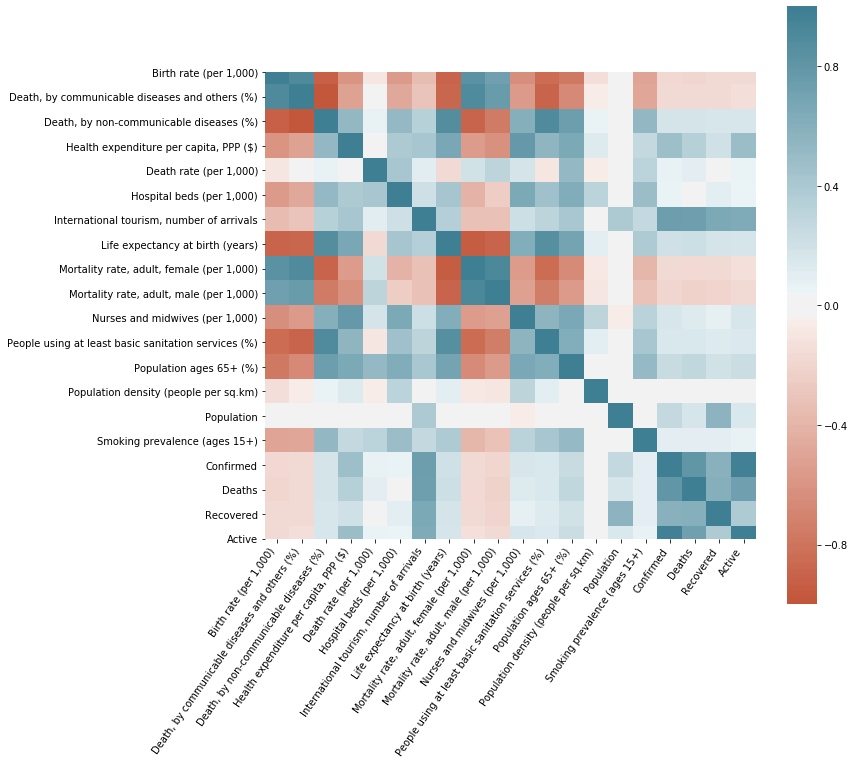

In [38]:
corr = master_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=55,
    horizontalalignment='right'
);

In [39]:
# corr['Confirmed'].sort_values()
corr['Deaths'].sort_values()

Mortality rate, adult, male (per 1,000)               -0.216323
Birth rate (per 1,000)                                -0.189186
Mortality rate, adult, female (per 1,000)             -0.176743
Death, by communicable diseases and others (%)        -0.158924
Population density (people per sq.km)                 -0.021242
Hospital beds (per 1,000)                              0.029831
Smoking prevalence (ages 15+)                          0.086920
Death rate (per 1,000)                                 0.092288
Nurses and midwives (per 1,000)                        0.121961
People using at least basic sanitation services (%)    0.149115
Population                                             0.172062
Death, by non-communicable diseases (%)                0.180569
Life expectancy at birth (years)                       0.221347
Population ages 65+ (%)                                0.285802
Health expenditure per capita, PPP ($)                 0.345952
Recovered                               

In [41]:
df_wdi.to_csv('datasets/world_development_index_clean.csv', index=False)